## HW 1
## Yarou Xu

### 1 Feedforward: Building a ReLu 2 Layer neural network

#### 1. Plot (draw) a network with:
> ####  • 2 inputs, 
#### • 2 hidden layers (where the ﬁrst layer contains 3 hidden units and the second contains 2 hidden units) and a
#### • 3-class output (use a softmax function) 

(<matplotlib.image.AxesImage at 0x1c2b0036e10>, Text(0.5,1,'Neural network'))

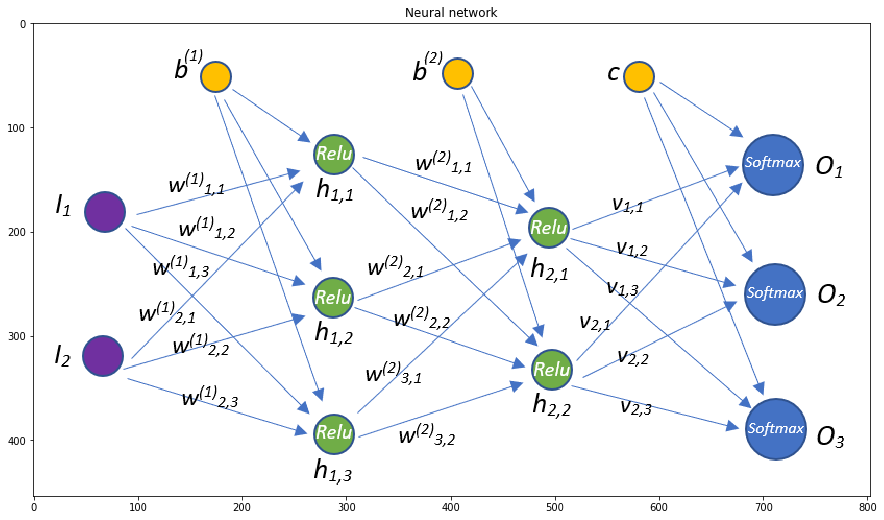

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img=mpimg.imread("HW1-neural network.png")
plt.figure(figsize = (15,15))
plt.imshow(img),plt.title('Neural network')

#### 2. Write out the mathematical equation for this network

For the first hidden layer:

$h_{1,1} = Relu(I_1 \cdot w^{(1)}_{1,1} + I_2 \cdot w^{(1)}_{2,1} + b^{(1)})$

$h_{1,2} = Relu(I_1 \cdot w^{(1)}_{1,2} + I_2 \cdot w^{(1)}_{2,2} + b^{(1)})$

$h_{1,3} = Relu(I_1 \cdot w^{(1)}_{1,3} + I_2 \cdot w^{(1)}_{2,3} + b^{(1)})$

For the second hiddrn layer:

$h_{2,1} = Relu(h_{1,1} \cdot w^{(2)}_{1,1} + h_{1,2} \cdot w^{(2)}_{2,1} + h_{1,3} \cdot w^{(2)}_{3,1} + b^{(2)})$

$h_{2,2} = Relu(h_{1,1} \cdot w^{(2)}_{1,2} + h_{1,2} \cdot w^{(2)}_{2,2} + h_{1,3} \cdot w^{(2)}_{3,2} + b^{(2)})$

For the output:

$O_{1} = Softmax(h_{2,1} \cdot v_{1,1} + h_{2,2} \cdot v_{2,1} + c)$

$O_{2} = Softmax(h_{2,1} \cdot v_{1,2} + h_{2,2} \cdot v_{2,2} + c)$

$O_{3} = Softmax(h_{2,1} \cdot v_{1,3} + h_{2,2} \cdot v_{2,3} + c)$

#### 3. Write out the function in python, call it ff nn 2 ReLu(...)

In [2]:
import numpy as np
# Define a Relu function
Relu = np.vectorize(lambda z: np.fmax(0,z))

# Define a Softmax function
Softmax = lambda z: np.exp(z)/(np.sum(np.exp(z),axis=1, keepdims=True))

# Define a function for this neural network
def ff_nn_2_ReLu(x,w1,w2,v,b1,b2,c):
    h1 = Relu(x.dot(w1) + b1)
    h2 = Relu(h1.dot(w2) + b2)
    out = Softmax(h2.dot(v) + c)
    return np.round(out,2)

#### 4. what are the class probabilities associated with the forward pass of each sample?

In [3]:
X = np.array([[1,0,0],[-1,-1,1]])
W1 = np.array([[1,0],[-1,0],[0,0.5]])
W2 = np.array([[1,0,0],[-1,-1,0]])
V = np.array([[1,1],[0,0],[-1,-1]])
b1 = np.array([0,0,1])
b2 = np.array([1,-1])
c = np.array([1,0,0])
ff_nn_2_ReLu(X.T,W1.T,W2.T,V.T,b1,b2,c)

array([[0.95, 0.05, 0.01],
       [0.84, 0.11, 0.04],
       [0.84, 0.11, 0.04]])

### 2 Gradient Descent
#### 1. What are the partial derivatives of f with respect to x and to y?
#### $f(x,y) = (1 - x)^2 + 100*(y - x^2)^2$

$\frac{\partial f}{\partial x} = 2(x - 1) - 400 \cdot x(y - x^2)$

$\frac{\partial f}{\partial y} = 200(y - x^2)$

#### 2. Create a visualization of the contours of the Rosenbrock function.

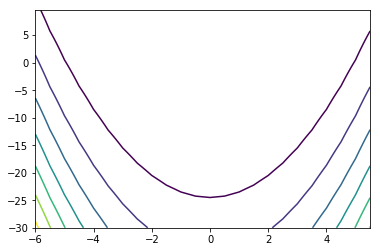

In [4]:
delta = 0.5
x = np.arange(-6, 6, delta)
y = np.arange(-30, 10, delta)
X, Y = np.meshgrid(x, y)
Z = (1-X)**2 + 100*(Y - X**2)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

#### 3. Write a Gradient Descent algorithm for ﬁnding the minimum of the function. Visualize your results with a few diﬀerent learning rates.

In [5]:
# Compute the gradient
def gradients_f(vector):
    x,y = vector
    df_dx = 2*(x - 1) - 400*x*(y - x**2)
    df_dy = 200*(y - x**2)
    return np.array([df_dx, df_dy])

def gradient_descent(starting_point = None, iterations = 10, lr = 1):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-5,5,size = 2)
    path = [point]
    for i in range(iterations):
        gradients= gradients_f(point)
        point = point - lr*gradients
        path.append(point)
    return np.array(path)

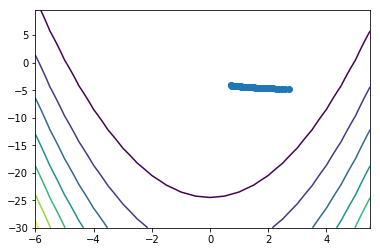

In [6]:
# Visualize the Trajectory
# Learning rate = 0.00001
np.random.seed(10)
trajectory = gradient_descent(iterations = 50, lr = 10**(-5))
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= trajectory[:,0]
y= trajectory[:,1]
plt.plot(x,y,'-o')

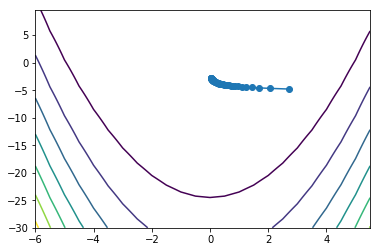

In [7]:
# Visualize the Trajectory
# Learning rate = 0.00005
np.random.seed(10)
trajectory = gradient_descent(iterations = 50, lr = 5*10**(-5))
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= trajectory[:,0]
y= trajectory[:,1]
plt.plot(x,y,'-o')

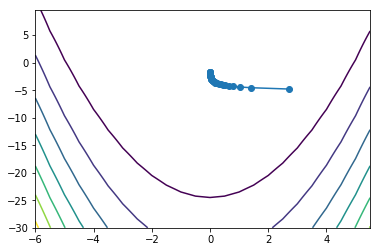

In [8]:
# Visualize the Trajectory
# Learning rate = 0.0001
np.random.seed(10)
trajectory = gradient_descent(iterations = 50, lr = 10**(-4))
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= trajectory[:,0]
y= trajectory[:,1]
plt.plot(x,y,'-o')

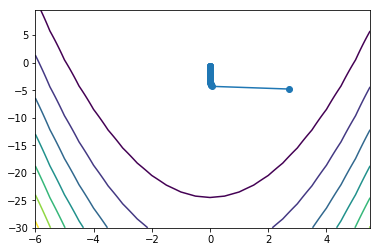

In [9]:
# Learning rate = 0.00001
np.random.seed(10)
trajectory = gradient_descent(iterations = 50, lr = 2*10**(-4))
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= trajectory[:,0]
y= trajectory[:,1]
plt.plot(x,y,'-o')

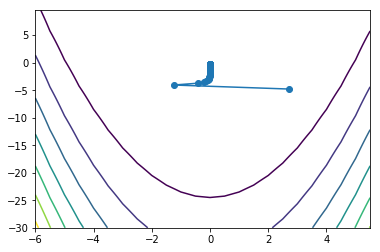

In [10]:
# Learning rate = 0.0003
np.random.seed(10)
trajectory = gradient_descent(iterations = 50, lr = 3*10**(-4))
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= trajectory[:,0]
y= trajectory[:,1]
plt.plot(x,y,'-o')

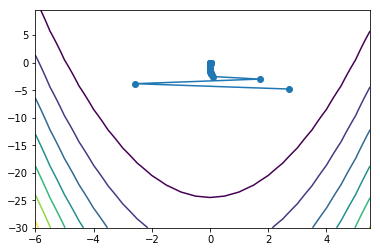

In [11]:
# Learning rate = 0.0004
np.random.seed(10)
trajectory = gradient_descent(iterations = 50, lr = 4*10**(-4))
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= trajectory[:,0]
y= trajectory[:,1]
plt.plot(x,y,'-o')

#### 4. Write a Gradient Descent With Momentum algorithm for ﬁnding the minimum. Visualize your results with a few diﬀerent settings of the algorithm’s hyperparameters.

In [12]:
# Compute the gradients with momentum
def grad_descent_momentum(starting_point=None, iterations=10, alpha=.5, lr=1):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    for i in range(iterations):
        grad = gradients_f(point)
        v = alpha*v + lr*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

#### 1. Keep alpha unchanged and decrease learning rate.

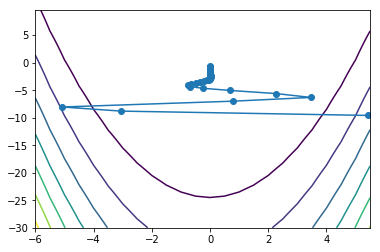

In [13]:
# Visualize the Trajectory
# Learning rate = 0.0001
np.random.seed(10)
trajectory = grad_descent_momentum(iterations=50, alpha=.5, lr=10**(-4))
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= trajectory[:,0]
y= trajectory[:,1]
plt.plot(x,y,'-o')

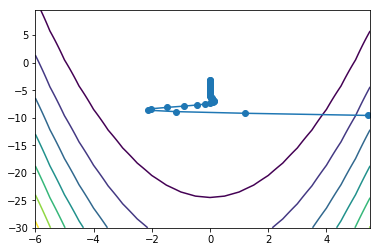

In [14]:
# Learning rate = 0.00005
np.random.seed(10)
trajectory = grad_descent_momentum(iterations=50, alpha=.5, lr=5*10**(-5))
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= trajectory[:,0]
y= trajectory[:,1]
plt.plot(x,y,'-o')

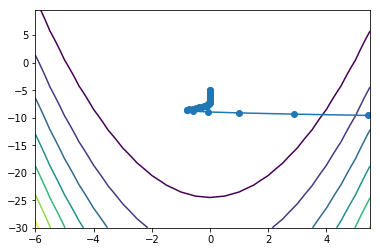

In [15]:
# Learning rate = 0.00003
np.random.seed(10)
trajectory = grad_descent_momentum(iterations=50, alpha=.5, lr=3*10**(-5))
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= trajectory[:,0]
y= trajectory[:,1]
plt.plot(x,y,'-o')

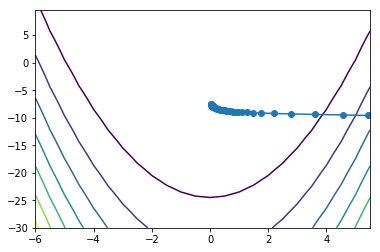

In [16]:
# Visualize the Trajectory
# Learning rate = 0.00001
np.random.seed(10)
trajectory = grad_descent_momentum(iterations=50, alpha=.5, lr=10**(-5))
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= trajectory[:,0]
y= trajectory[:,1]
plt.plot(x,y,'-o')

#### 2. Keep learning rate unchanged and increase alpha.

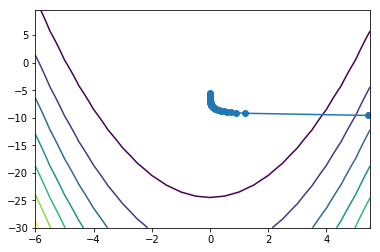

In [17]:
# alpha = 0.01
np.random.seed(10)
trajectory = grad_descent_momentum(iterations=50, alpha=0.01, lr=5*10**(-5))
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= trajectory[:,0]
y= trajectory[:,1]
plt.plot(x,y,'-o')

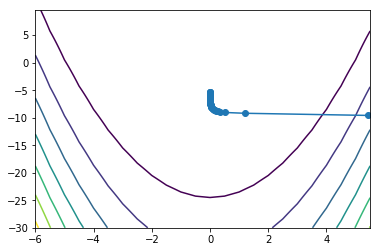

In [18]:
# alpha = 0.1
np.random.seed(10)
trajectory = grad_descent_momentum(iterations=50, alpha=.1, lr=5*10**(-5))
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= trajectory[:,0]
y= trajectory[:,1]
plt.plot(x,y,'-o')

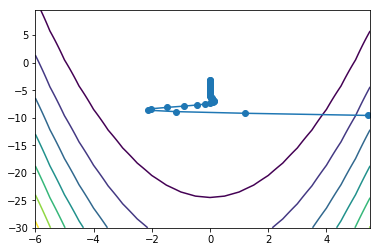

In [19]:
# alpha = 0.5
np.random.seed(10)
trajectory = grad_descent_momentum(iterations=50, alpha=0.5, lr=5*10**(-5))
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= trajectory[:,0]
y= trajectory[:,1]
plt.plot(x,y,'-o')

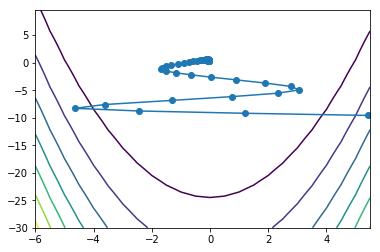

In [20]:
# alpha = 0.8
np.random.seed(10)
trajectory = grad_descent_momentum(iterations=50, alpha=0.8, lr=5*10**(-5))
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= trajectory[:,0]
y= trajectory[:,1]
plt.plot(x,y,'-o')

### 3 Backprop
#### 1. For the same network as in Number 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.

There are 2 inputs, i = 1, 2;

3 unites in the first hidden layer, j = 1,2,3;

2 unites in the second hidden layer, k = 1, 2;

3 outputs, s = 1,2,3.

$L(y, \hat y) = -(y_1\log \hat y_1 + y_2\log \hat y_2 + y_3\log \hat y_3)$

$\begin {aligned}\frac{\partial L}{\partial V_{ks}} &= \sum_s \frac{\partial L}{\partial \hat y_s}\frac{\partial \hat y_s}{\partial a_s^{(3)}}\frac{\partial a_s^{(3)}}{\partial V_{ks}} \\
&= (\hat y_s - \mathbb{1}_{(s = tc)})h_k^{(2)}
\end {aligned}$ 

$\begin {aligned}\frac{\partial L}{\partial c} &= \sum_s \frac{\partial L}{\partial \hat y_s}\frac{\partial \hat y_s}{\partial a_s^{(3)}}\frac{\partial a_s^{(3)}}{\partial c} \\
&= \sum_s(\hat y_s - \mathbb{1}_{(s = tc)})
\end {aligned}$ 

$\begin {aligned}\frac{\partial L}{\partial W_{jk}^{(2)}} &= \sum_s \frac{\partial L}{\partial \hat y_s}\frac{\partial \hat y_s}{\partial a_s^{(3)}}\frac{\partial a_s^{(3)}}{\partial h_k^{(2)}}\frac{\partial h_k^{(2)}}{\partial a_k^{(2)}} \frac{\partial a_k^{(2)}}{\partial W_{jk}^{(2)}}  \\
&= \sum_s(\hat y_s - \mathbb{1}_{(s = tc)})V_{ks}\mathbb{1}_{(a_k^{(2)} > 0)}h_j^{(1)}
\end {aligned}$ 

$\begin {aligned}\frac{\partial L}{\partial b^{(2)}} &= \sum_s \frac{\partial L}{\partial \hat y_s}\frac{\partial \hat y_s}{\partial a_s^{(3)}}(\sum_k \frac{\partial a_s^{(3)}}{\partial h_k^{(2)}}\frac{\partial h_k^{(2)}}{\partial a_k^{(2)}} \frac{\partial a_k^{(2)}}{\partial b^{(2)}})  \\
&= \sum_s(\hat y_s - \mathbb{1}_{(s = tc)})(\sum_k V_{ks}\mathbb{1}_{(a_k^{(2)} > 0)})
\end {aligned}$ 

$\begin {aligned}\frac{\partial L}{\partial W_{ij}^{(1)}} &= \sum_s \frac{\partial L}{\partial \hat y_s}\frac{\partial \hat y_s}{\partial a_s^{(3)}}(\sum_k \frac{\partial a_s^{(3)}}{\partial h_k^{(2)}}\frac{\partial h_k^{(2)}}{\partial a_k^{(2)}}\frac{\partial a_k^{(2)}}{\partial h_j^{(1)}} \frac{\partial h_j^{(1)}}{\partial a_j ^{(1)}} \frac{\partial a_j ^{(1)}}{\partial W_{ij}^{(1)}})  \\
&= \sum_s(\hat y_s - \mathbb{1}_{(s = tc)})(\sum_k V_{ks}\mathbb{1}_{(a_k^{(2)} > 0)}W_{jk}^{(2)}\mathbb{1}_{(a_j^{(1)} > 0)}x_i)
\end {aligned}$ 

$\begin {aligned}\frac{\partial L}{\partial b^{(1)}} &= \sum_s \frac{\partial L}{\partial \hat y_s}\frac{\partial \hat y_s}{\partial a_s^{(3)}}(\sum_k \frac{\partial a_s^{(3)}}{\partial h_k^{(2)}}\frac{\partial h_k^{(2)}}{\partial a_k^{(2)}}(\sum_j \frac{\partial a_k^{(2)}}{\partial h_j^{(1)}} \frac{\partial h_j^{(1)}}{\partial a_j ^{(1)}} \frac{\partial a_j ^{(1)}}{\partial b^{(1)}}))  \\
&= \sum_s(\hat y_s - \mathbb{1}_{(s = tc)})(\sum_k V_{ks}\mathbb{1}_{(a_k^{(2)} > 0)}(\sum_j W_{jk}^{(2)}\mathbb{1}_{(a_j^{(1)} > 0)}))
\end {aligned}$ 

#### 2. Write a function grad f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [21]:
################
#   Gradient   #
################

def grad(X,h1,h2,Y,Y_hat,parameters):  
    # Unpacking parameters    
    W1,b1,W2,b2,V,c = parameters
  
    # Gradients - Relu
    dW1 = X.T.dot(((Y_hat - Y).dot(V.T)*(h2 > 0)).dot(W2.T)*(h1 > 0))
    db1 = (((Y_hat - Y).dot(V.T)*(h2 > 0)).dot(W2.T)*(h1 > 0)).sum(axis=0)   
    dW2 = h1.T.dot(((Y_hat - Y).dot(V.T)*(h2>0)))
    db2 = ((Y_hat - Y).dot(V.T)*(h2>0)).sum(axis=0) 
    dV = h2.T.dot(Y_hat - Y)
    dc = (Y_hat - Y).sum(axis=0)
    
    #return {'dW1':dW1,'db1':db1,'dW2':dW2,'db2':db2,'dV':dV,'dc':dc}
    return dW1,db1,dW2,db2,dV,dc

#### 3. Generate a synthetic dataset of 3 equally sampled bivariate Gaussian distributions with parameters $µ_1 = (0,2)$, $µ_2 = (2,−2)$, $µ_3 = (−2,−2)$; $Σ_i = \left[
 \begin{matrix}
   1 & 0\\
   0 & 1 
  \end{matrix} 
\right]$; i = 1,2,3 that you’ll use for ﬁtting your network. Plot your sample dataset, coloring data points by their respective class.

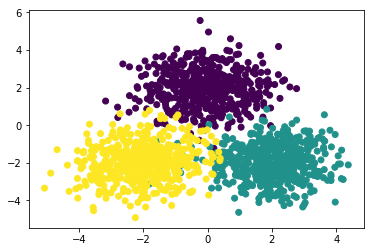

In [22]:
import pandas as pd
def gen_gmm_data(n = 500, plot=False):
    # Fixing seed for repeatability
    np.random.seed(123)
    
    # Parameters of a normal distribuion
    mean_1 = [0, 2] ; mean_2 = [2, -2] ; mean_3 = [-2, -2]
    mean = [mean_1, mean_2, mean_3] ; cov = [[1, 0], [0, 1]]  
      
    # Generate sample data
    for i in range(3):
        x1,x2 = np.random.multivariate_normal(mean[i], cov, n).T
        if (i==0):
            xs = np.array([x1,x2])
            cl = np.array([n*[i]])
        else: 
            xs_new = np.array([x1,x2])
            cl_new = np.array([n*[i]])
            xs = np.concatenate((xs, xs_new), axis = 1)
            cl = np.concatenate((cl, cl_new), axis = 1)
    
    # Plot?
    if plot:
        plt.scatter(xs[0],xs[1], c = cl[0])

    # One hot encoding classes
    y = pd.Series(cl[0].tolist())
    y = pd.get_dummies(y).as_matrix() 

    # Normalizing data (prevents overflow errors)     
    mu = xs.mean(axis = 1)
    std = xs.std(axis = 1)
    xs = (xs.T - mu) / std
    
    return xs, y, cl
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#  Generate data for network    #
#################################
X, Y, cl = gen_gmm_data(n=500, plot= True)

#### 4. Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

In [23]:
#######################
#  Utility Functions  #
#######################
def predict(Y_hat):
    return np.argmax(Y_hat, axis=1)

def error_rate(Y_hat, cl):
    prediction = predict(Y_hat)
    return np.mean(prediction != cl)

def loss(Y_hat, Y):
    tot = Y * np.log(Y_hat)
    return -tot.sum()

In [24]:
####################################
#   2 - Hidden Layer ReLU Network   #
####################################
def forward(X, parameters):
    # Unpacking parameters    
    W1,b1,W2,b2,V,c = parameters
    
    # Forward pass
    a1 = X.dot(W1) + b1
    h1 = Relu(a1)
    a2 = h1.dot(W2) + b2
    h2 = Relu(a2)
    a3 = h2.dot(V) + c
    Y_hat = Softmax(a3)
    return h1,h2,Y_hat

In [25]:
def parameter_update(parameters,  grads, 
                     momentum_params = [0,0,0,0,0,0], 
                     lr = 1, reg = 0, alpha = 0):
    # Unpacking parameters            
    W1,b1,W2,b2,V,c = parameters
    dW1,db1,dW2,db2,dV,dc = grads
    vW1,vb1,vW2,vb2,vV,vc = momentum_params
    
    # Momentum update
    vW1  = alpha * vW1 -  lr * (dW1 + reg*W1)
    vb1 = alpha * vb1 - lr * (db1 + reg*b1)
    vW2  = alpha * vW2 -  lr * (dW2 + reg*W2)
    vb2 = alpha * vb2 - lr * (db2 + reg*b2)
    vV  = alpha * vV -  lr * (dV + reg*V)
    vc = alpha * vc - lr * (dc + reg*c)
    momentum_params = [vW1,vb1,vW2,vb2,vV,vc] 
    
    # Parameter updates
    W1  = W1  + vW1
    b1 = b1 + vb1
    W2  = W2  + vW2
    b2 = b2 + vb2
    V  = V  + vV
    c = c + vc
    parameters =[W1,b1,W2,b2,V,c]
          
    return parameters, momentum_params

In [26]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#      Building the model     #
###############################

def run_model(X, Y, cl,
              iterations = 1000,
              regularization_include = False,
              momentum_include = False, lr = 0.01, reg = 0, alpha = 0.9):    

    ###################################
    #   Initial values for network    #
    ###################################
    # Intialize weights
    np.random.seed(123)
    W1 = np.random.randn(6).reshape(3,2)
    b1 = 0
    W2= np.random.randn(6).reshape(2,3)
    b2 = 0
    V = np.random.randn(6).reshape(3,2)
    c = 0
    parameters = [W1.T,b1,W2.T,b2,V.T,c]
    
    # Hyperparameters 
    lr = lr
    reg = reg * regularization_include
    
    # Momentum parameters
    alpha = alpha * momentum_include
    vV = 0
    vc = 0
    vW1 = 0
    vb1 = 0
    vW2 = 0
    vb2 = 0
    momentum_params = [vW1,vb1,vW2,vb2,vV,vc]    
    
    # Place holder for losses
    losses = []
    errors = []    
   
    ###################
    #   Run the model #
    ###################
    for i in range(0,iterations):
        # -- Forward propoagation --
        h1,h2,Y_hat = forward(X,parameters)
        
        # -- Backward propagation --
        # Gradient calculation
        grads_in = grad(X,h1,h2,Y,Y_hat,parameters)
        # Parameter update
        new_params, new_mom_param = parameter_update(parameters, grads_in, 
                             momentum_params, 
                             lr = lr, reg = reg , alpha = alpha)
        
        # -- Updating values --
        h1,h2,Y_hat = forward(X,new_params)
        parameters = new_params
        momentum_params = new_mom_param
        
        # Prediction and Error rate            
        errs_i = error_rate(Y_hat, cl) ; errors.append(errs_i)
        loss_i = loss(Y_hat, Y); losses.append(loss_i)
        if ((i % 25) == 0):    
            print(
            '''
            ---- Iteration {i} ----
            Error rate : {er}
            Loss: {loss}
            '''.format(i= i, er = errs_i, loss = loss_i))
    return errors, losses

#### 1. When learning rate is 0.0003.


            ---- Iteration 0 ----
            Error rate : 0.6686666666666666
            Loss: 1647.6065380385487
            

            ---- Iteration 25 ----
            Error rate : 0.30933333333333335
            Loss: 938.2390621394803
            

            ---- Iteration 50 ----
            Error rate : 0.22866666666666666
            Loss: 781.5624007231647
            

            ---- Iteration 75 ----
            Error rate : 0.17066666666666666
            Loss: 693.1438935597716
            

            ---- Iteration 100 ----
            Error rate : 0.112
            Loss: 591.7917560281105
            

            ---- Iteration 125 ----
            Error rate : 0.12533333333333332
            Loss: 592.0201047956036
            

            ---- Iteration 150 ----
            Error rate : 0.09933333333333333
            Loss: 511.0231886822239
            

            ---- Iteration 175 ----
            Error rate : 0.066
            Loss: 444.253054823186

Text(0.5,0,'Iteration')

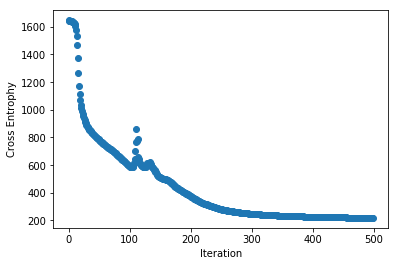

In [47]:
errores, losses = run_model(X, Y, cl, iterations = 500, regularization_include = False,
              momentum_include = False, lr = 0.0003)
plt.plot(losses,'o')
plt.ylabel("Cross Entrophy")
plt.xlabel("Iteration")

#### 1. When learning rate is 0.0001.


            ---- Iteration 0 ----
            Error rate : 0.6686666666666666
            Loss: 1650.836297101652
            

            ---- Iteration 25 ----
            Error rate : 0.664
            Loss: 1629.5374798994671
            

            ---- Iteration 50 ----
            Error rate : 0.3393333333333333
            Loss: 1168.241546804842
            

            ---- Iteration 75 ----
            Error rate : 0.30666666666666664
            Loss: 933.4387392805698
            

            ---- Iteration 100 ----
            Error rate : 0.2813333333333333
            Loss: 858.9569275698875
            

            ---- Iteration 125 ----
            Error rate : 0.252
            Loss: 813.6261724253302
            

            ---- Iteration 150 ----
            Error rate : 0.21866666666666668
            Loss: 777.1514971788673
            

            ---- Iteration 175 ----
            Error rate : 0.20066666666666666
            Loss: 745.8650984326982


Text(0.5,0,'Iteration')

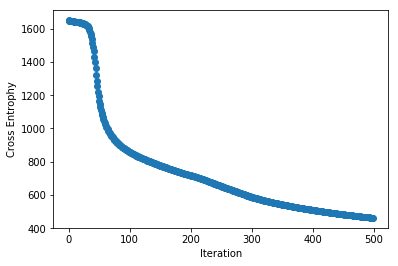

In [51]:
errores, losses = run_model(X, Y, cl, iterations = 500, regularization_include = False,
              momentum_include = False, lr = 0.0001)
plt.plot(losses,'o')
plt.ylabel("Cross Entrophy")
plt.xlabel("Iteration")

By decreasing the learning rate, the converge line for total loss becomes more smooth, but the converge rate becomes smaller.

#### 5. Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more eﬃciently.

#### 1. When learning rate is 0.0003.


            ---- Iteration 0 ----
            Error rate : 0.6686666666666666
            Loss: 1647.6065380385487
            

            ---- Iteration 25 ----
            Error rate : 0.296
            Loss: 814.0647624162614
            

            ---- Iteration 50 ----
            Error rate : 0.14533333333333334
            Loss: 661.4217853985774
            

            ---- Iteration 75 ----
            Error rate : 0.092
            Loss: 515.1201478488472
            

            ---- Iteration 100 ----
            Error rate : 0.086
            Loss: 448.30318580094394
            

            ---- Iteration 125 ----
            Error rate : 0.056666666666666664
            Loss: 398.99276206930415
            

            ---- Iteration 150 ----
            Error rate : 0.050666666666666665
            Loss: 329.0949271522123
            

            ---- Iteration 175 ----
            Error rate : 0.042
            Loss: 263.62012851369457
            

       

Text(0.5,0,'Iteration')

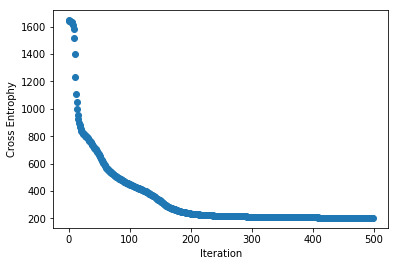

In [52]:
errores, losses = run_model(X, Y, cl, iterations = 500, regularization_include = False,
              momentum_include = True, lr = 0.0003, alpha = 0.5)
plt.plot(losses,'o')
plt.ylabel("Cross Entrophy")
plt.xlabel("Iteration")

#### 2. When learning rate is 0.0001.


            ---- Iteration 0 ----
            Error rate : 0.6686666666666666
            Loss: 1650.836297101652
            

            ---- Iteration 25 ----
            Error rate : 0.35333333333333333
            Loss: 1436.4764678242536
            

            ---- Iteration 50 ----
            Error rate : 0.2986666666666667
            Loss: 877.2526701474272
            

            ---- Iteration 75 ----
            Error rate : 0.24266666666666667
            Loss: 795.6935187410148
            

            ---- Iteration 100 ----
            Error rate : 0.196
            Loss: 734.061468549017
            

            ---- Iteration 125 ----
            Error rate : 0.15533333333333332
            Loss: 675.8966913909061
            

            ---- Iteration 150 ----
            Error rate : 0.11733333333333333
            Loss: 608.3520312700689
            

            ---- Iteration 175 ----
            Error rate : 0.09866666666666667
            Loss: 555.

Text(0.5,0,'Iteration')

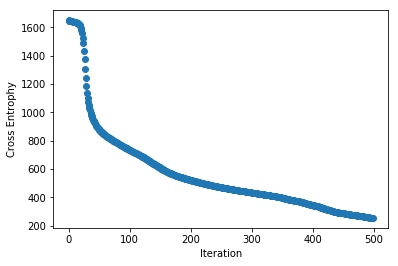

In [53]:
errores, losses = run_model(X, Y, cl, iterations = 500, regularization_include = False,
              momentum_include = True, lr = 0.0001, alpha = 0.5)
plt.plot(losses,'o')
plt.ylabel("Cross Entrophy")
plt.xlabel("Iteration")

When the learning rate is big enough, which is 0.0003 for this model, adding momentum to the model only smooths the converge line for the total loss, but the converge rates are almost the same. After 475 interations, the loss for model without momentum is 220.19, and the loss for model with momentum is 203.75. 

When the learning is very small, which is 0.0001 for this model, adding momentum to the model speeds up the converge process. After 475 interations, the loss for model without momentum is 472.53, and the loss for model with momentum is 270.39. 